In [ ]:
# i look at preproc scalers below but this isn't good because
# it relies on the input being a particular size

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

import numpy as np

In [2]:
!ls training_data/

alpha.npy   amp_22.npy	coords.npy  phi_21.npy	times.npy
amp_21.npy  beta.npy	gamma.npy   phi_22.npy


In [3]:
times = np.load('training_data/times.npy')

In [17]:
alpha = np.load('training_data/alpha.npy')

In [70]:
gamma = np.load('training_data/gamma.npy')

In [200]:
beta = np.load('training_data/beta.npy')

In [19]:
times.shape

(1219,)

In [20]:
alpha.shape

(1000, 1219)

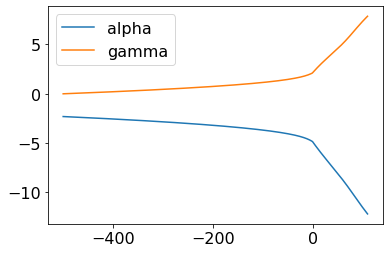

In [21]:
plt.figure()
plt.plot(times, alpha[0], label='alpha')
plt.plot(times, gamma[0], label='gamma')
plt.legend()

In [22]:
plt.figure()
plt.plot(times, alpha[0])
plt.plot(times, -gamma[0])

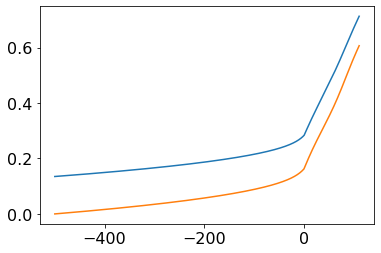

In [27]:
plt.figure()
plt.plot(times, -alpha[0]/np.abs(alpha).max())
plt.plot(times, gamma[0]/np.abs(gamma).max())

# try preproc


In [28]:
import sklearn.preprocessing

In [257]:
alpha_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=[0,1])
# alpha_scaler = sklearn.preprocessing.Normalizer()
# alpha_scaler = sklearn.preprocessing.StandardScaler()
# alpha_scaler = sklearn.preprocessing.QuantileTransformer()

In [258]:
gamma_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=[0,1])
# gamma_scaler = sklearn.preprocessing.Normalizer()
# gamma_scaler = sklearn.preprocessing.StandardScaler()
# gamma_scaler = sklearn.preprocessing.QuantileTransformer()

In [259]:
beta_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=[0,1])
# beta_scaler = sklearn.preprocessing.Normalizer()
# beta_scaler = sklearn.preprocessing.StandardScaler()
# beta_scaler = sklearn.preprocessing.QuantileTransformer()

In [334]:
alpha_scaler.fit(alpha)

MinMaxScaler(feature_range=[0, 1])

In [335]:
gamma_scaler.fit(gamma)

MinMaxScaler(feature_range=[0, 1])

In [336]:
beta_scaler.fit(beta)

MinMaxScaler(feature_range=[0, 1])

In [337]:
alpha_scaler.get_params()

{'clip': False, 'copy': True, 'feature_range': [0, 1]}

In [338]:
alpha_scaled = alpha_scaler.transform(alpha)

In [339]:
alpha_scaled.shape

(1000, 1219)

In [340]:
gamma.shape

(1000, 1219)

In [341]:
gamma.T.shape

(1219, 1000)

In [342]:
gamma_scaled = gamma_scaler.transform(gamma)

In [343]:
beta_scaled = beta_scaler.transform(beta)

In [344]:
plt.figure()
for i in range(10):
    plt.plot(times, alpha[i])


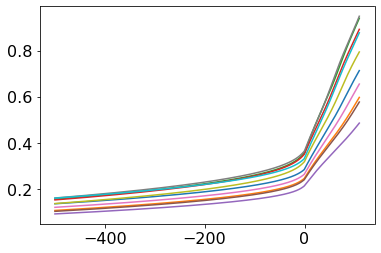

In [345]:
plt.figure()
for i in range(10):
    plt.plot(times, -alpha[i]/np.abs(alpha).max())


In [346]:
plt.figure()
for i in range(10):
    plt.plot(times, alpha_scaled[i])


In [347]:
plt.figure()
for i in range(10):
    plt.plot(times, gamma[i])
# plt.xlim(-100,100)

In [348]:
plt.figure()
for i in range(10):
    plt.plot(times, gamma_scaled[i])
# plt.xlim(-100,100)

In [349]:
gamma.shape

(1000, 1219)

In [350]:
gamma[0].reshape(-1,1).shape

(1219, 1)

In [351]:
gamma[0].reshape(1,-1).shape

(1, 1219)

In [359]:
gamma_scaler.transform(gamma[0].reshape(1,-1)).shape

(1, 1219)

In [360]:
plt.figure()
for i in range(10):
    plt.plot(times, gamma_scaler.transform(gamma[i].reshape(1,-1))[0])
# plt.xlim(-100,100)

In [354]:
np.testing.assert_array_almost_equal(gamma, gamma_scaler.inverse_transform(gamma_scaled))

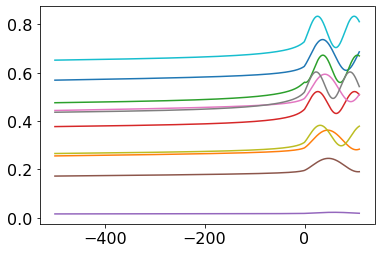

In [355]:
plt.figure()
for i in range(10):
    plt.plot(times, beta[i])
# plt.xlim(-100,100)

In [377]:
plt.figure()
for i in range(10):
    plt.plot(times, beta[i]/beta.max())
# plt.xlim(-100,100)

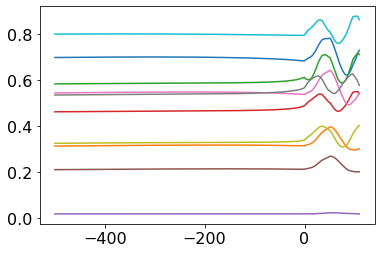

In [356]:
plt.figure()
for i in range(10):
    plt.plot(times, beta_scaled[i])
# plt.xlim(-100,100)

# compare alpha and gamma

In [372]:
alpha_new = -(alpha - alpha[:,0][:,np.newaxis])

In [378]:
beta_new = -(beta - beta[:,0][:,np.newaxis])

In [373]:
alpha_new.shape

(1000, 1219)

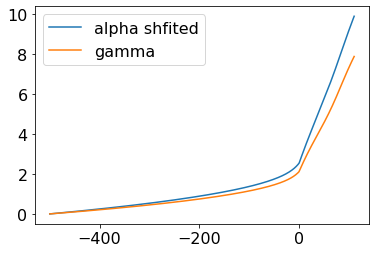

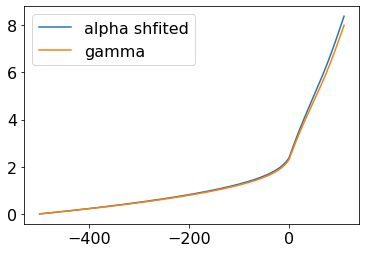

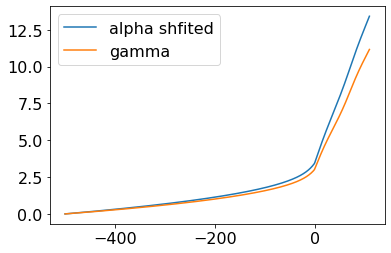

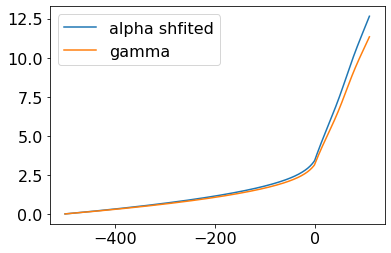

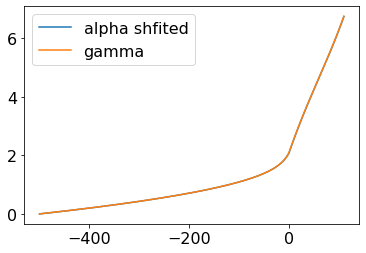

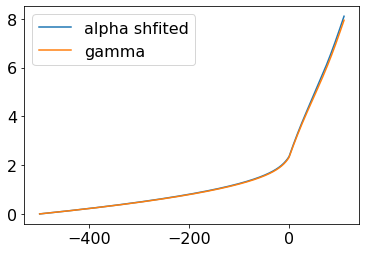

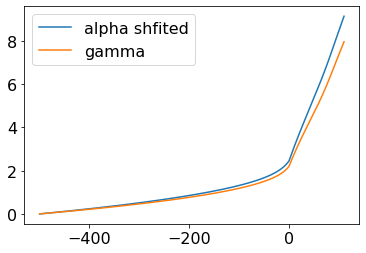

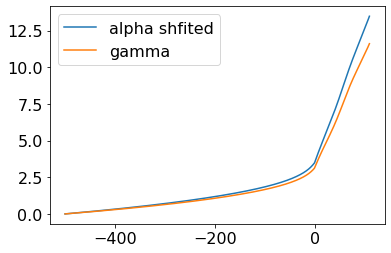

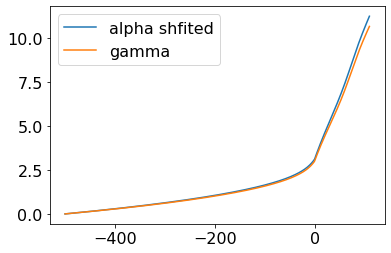

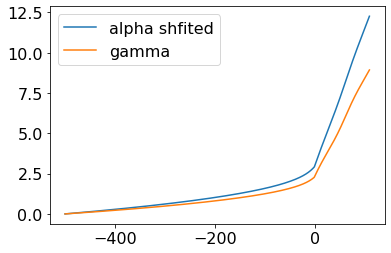

In [376]:

for i in range(10):
    plt.figure()
    plt.plot(times, alpha_new[i], label='alpha shfited')
#     plt.plot(times, alpha[i]-alpha[i][0])
#     plt.plot(times, -(alpha[i]-alpha[i][0]), label='alpha shfited')
#     plt.plot(times, gamma[i]-gamma[i][0], label='gamma')
    plt.plot(times, gamma[i], label='gamma')
    plt.legend()

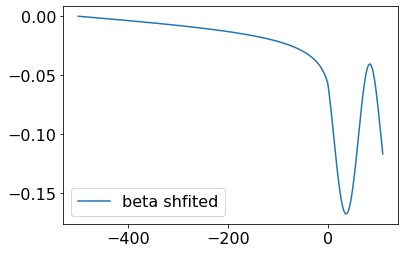

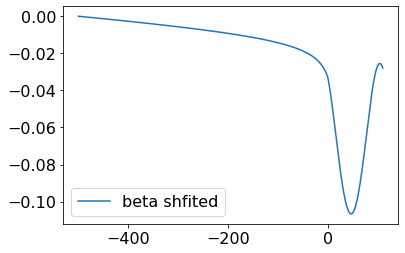

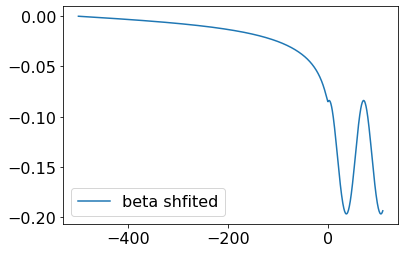

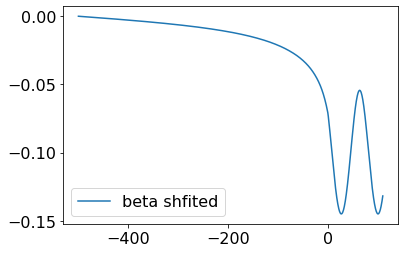

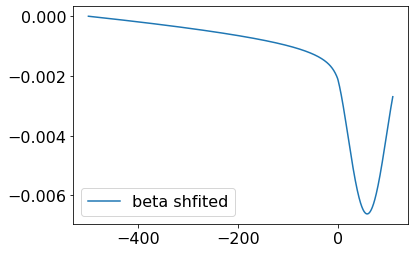

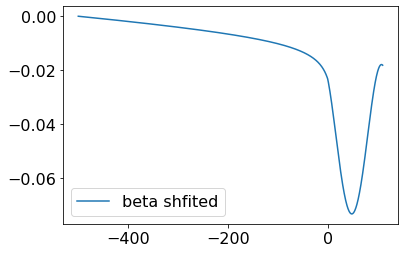

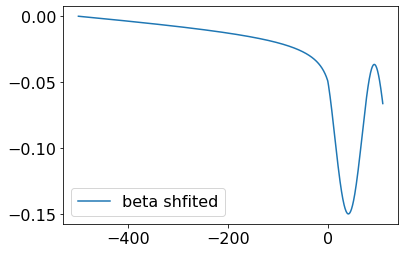

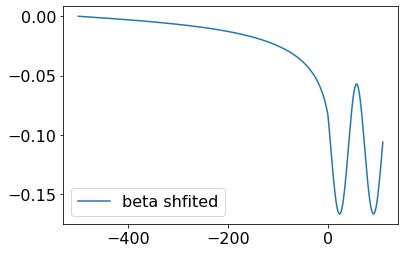

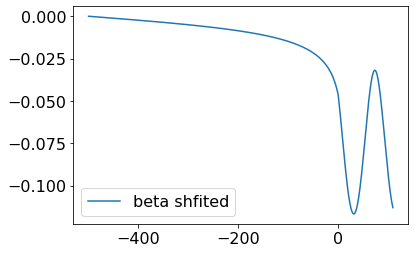

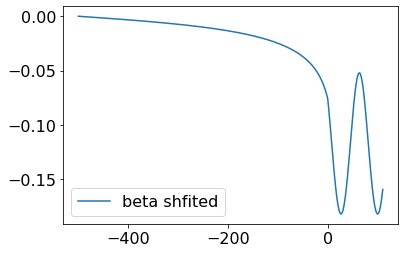

In [379]:

for i in range(10):
    plt.figure()
    plt.plot(times, beta_new[i], label='beta shfited')
    plt.legend()

In [ ]:
plt.figure()
for i in range(10):

    plt.plot(times, beta_new[i], label='beta shfited')
